In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import hypergeom

In [2]:
data = pd.read_csv("~/Downloads/gocams2genes_20220728.txt", header=0, names=["gocam", "title", "gp_labels","ID","taxon","taxon_label","modelstate"], sep="\t")
data['gp_labels'] = data['gp_labels'].apply(lambda x: x.split(','))
data['ID'] = data['ID'].apply(lambda x: x.split(','))
data['title']=data['title'].apply(lambda x: x.split('^')[0])
data['modelstate']=data['modelstate'].apply(lambda x: x.split('^')[0])
data['gocam']=data['gocam'].apply(lambda x: x[1:len(x)-1])
data = data[data['taxon_label'].apply(lambda x: ('Homo sapiens' in x) or ('Mus musculus' in x))]
data = data[['gocam','title','ID']]

In [3]:
reactome_data = pd.read_csv("~/Downloads/metabolic_gocams2genes_20220728.tsv", header=0, names=["gocam", "title", "ID","taxon","taxon_labels","modelstate"], sep="\t")
reactome_data['ID'] = reactome_data['ID'].apply(lambda x: x.split(','))
reactome_data['taxon_labels'] = reactome_data['taxon_labels'].apply(lambda x: x.split(','))
reactome_data['title']=reactome_data['title'].apply(lambda x: x.split('^')[0])
reactome_data['modelstate']=reactome_data['modelstate'].apply(lambda x: x.split('^')[0])
reactome_data['gocam']=reactome_data['gocam'].apply(lambda x: x[1:len(x)-1])
reactome_data = reactome_data[reactome_data['taxon_labels'].apply(lambda x: 'Homo sapiens' in x)]
reactome_data = reactome_data[['gocam','title','ID']]

In [4]:
#GO CAMs with multiple taxon labels
t = data[data['gocam'].duplicated(keep=False)]
#t.sort_values(by='gocam')

In [5]:
#THERE ARE A FEW INSTANCES OF ONE GOCAM HAVING MORE THAN ONE TAXON LISTED
#ex: 5e72450500004019 has both R1AB_SARS2 and pp1ab Scov2
len(data.gocam.unique())

142

In [6]:
dataAsMatrix = pd.DataFrame()
#splits the lists of genes into multiple rows because row[ID] is a list
d = pd.concat([data,reactome_data])
for index, row in d.iterrows():
    temp= pd.DataFrame({"gocam": row['gocam'], "title":row['title'],"ID": row['ID'] })
    dataAsMatrix = dataAsMatrix.append(temp)
dataAsMatrix[['gocam','title','ID']].drop_duplicates()
dataAsMatrix.reset_index(drop=True, inplace=True)
dataAsMatrix
data = d

Text(0, 0.5, 'Number of Genes')

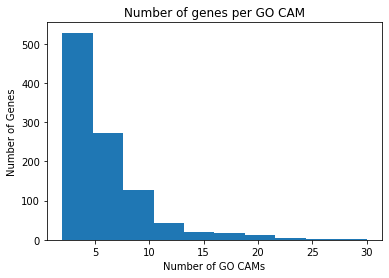

In [27]:
# DISTRIBUTION OF NUMBER OF GENES PER GOCAM
dist = data['ID'].str.len().values
plt.hist(dist,10,range=(2,30))
plt.title('Number of genes per GO CAM')
plt.xlabel('Number of GO CAMs')
plt.ylabel('Number of Genes')

In [8]:
len(dataAsMatrix),len(dataAsMatrix.drop_duplicates()),len(dataAsMatrix[['gocam','title','ID']].drop_duplicates()), len(dataAsMatrix[['gocam','ID']].drop_duplicates())


(6218, 6209, 6209, 6209)

In [9]:
dataAsMatrix[dataAsMatrix[['gocam','ID']].duplicated()]

,gocam,title,ID
6195,http://model.geneontology.org/613aae0000000061,cGAS-STING (Human),http://identifiers.org/uniprot/Q8N884
6196,http://model.geneontology.org/613aae0000000061,cGAS-STING (Human),http://identifiers.org/uniprot/Q86WV6
6197,http://model.geneontology.org/613aae0000000061,cGAS-STING (Human),http://identifiers.org/uniprot/Q92993-4
6201,http://model.geneontology.org/613aae0000000061,cGAS-STING (Human),http://identifiers.org/uniprot/O75531
6203,http://model.geneontology.org/613aae0000000061,cGAS-STING (Human),http://identifiers.org/uniprot/P31749
6204,http://model.geneontology.org/613aae0000000061,cGAS-STING (Human),http://identifiers.org/uniprot/P42574
6205,http://model.geneontology.org/613aae0000000061,cGAS-STING (Human),http://identifiers.org/uniprot/O00743
6206,http://model.geneontology.org/613aae0000000061,cGAS-STING (Human),http://identifiers.org/uniprot/Q9UHD2
6207,http://model.geneontology.org/613aae0000000061,cGAS-STING (Human),http://identifiers.org/uniprot/Q9BRZ2


In [10]:
data[data['gocam']=='http://model.geneontology.org/60ad85f700000058']

,gocam,title,ID
89,http://model.geneontology.org/60ad85f700000058,Atf2 mouse,"[http://identifiers.org/mgi/MGI:109349, http:/..."


In [11]:
#confirming that my conversion worked
sum(dist)

6218

In [12]:
# NUMBER OF GENES OF EACH IDENTIFIER TYPE ACROSS GOCAMS
d = dataAsMatrix
d = d[['ID']].drop_duplicates()
d.reset_index(drop=True, inplace=True)
d['ID']= d['ID'].apply(lambda x: x.rsplit("/",1)[0])
d.ID.value_counts()

http://purl.obolibrary.org/obo/go/extensions    3076
http://identifiers.org/mgi                       301
http://identifiers.org/uniprot                   265
https://www.ebi.ac.uk/complexportal/complex        2
http://purl.obolibrary.org/obo                     2
http://rnacentral.org/rna                          1
Name: ID, dtype: int64

In [13]:
# NUMBER OF *OCCURENCES* OF GENES WITH EACH IDENFIFIER TYPE ACROSS GOCAMS
d = dataAsMatrix
d = d[['gocam','ID']].drop_duplicates()
d.reset_index(drop=True, inplace=True)
#d = d[d['ID'].apply(lambda x: x.split("/")[-2])=='uniprot']
d['ID']= d['ID'].apply(lambda x: x.rsplit("/",1)[0])
d.ID.value_counts()

http://purl.obolibrary.org/obo/go/extensions    5315
http://identifiers.org/mgi                       518
http://identifiers.org/uniprot                   371
https://www.ebi.ac.uk/complexportal/complex        2
http://purl.obolibrary.org/obo                     2
http://rnacentral.org/rna                          1
Name: ID, dtype: int64

In [20]:
data_cleaned = dataAsMatrix
data_cleaned = data_cleaned[['gocam','ID']].drop_duplicates()
data_cleaned.reset_index(drop=True, inplace=True)
data_cleaned

,gocam,ID
0,http://model.geneontology.org/61e0e55600000239,http://identifiers.org/mgi/MGI:98724
1,http://model.geneontology.org/61e0e55600000239,http://identifiers.org/mgi/MGI:108088
2,http://model.geneontology.org/61e0e55600000239,http://identifiers.org/mgi/MGI:95294
3,http://model.geneontology.org/61e0e55600000239,http://identifiers.org/mgi/MGI:95805
4,http://model.geneontology.org/61e0e55600000239,http://identifiers.org/mgi/MGI:99511
...,...,...
6204,http://model.geneontology.org/5970219a00000013,http://identifiers.org/uniprot/O95427
6205,http://model.geneontology.org/5970219a00000013,http://identifiers.org/uniprot/Q9NUD9
6206,http://model.geneontology.org/5970219a00000013,http://identifiers.org/uniprot/Q92521
6207,http://model.geneontology.org/5970219a00000013,http://purl.obolibrary.org/obo/GO_0032991


In [21]:
test= data_cleaned
test = test[test['ID'].apply(lambda x: x.split("/")[-2])=='uniprot']
test['ID']= test['ID'].apply(lambda x: x.split("/")[-1])
test

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,gocam,ID
186,http://model.geneontology.org/627d95ee00000024,P29597
187,http://model.geneontology.org/627d95ee00000024,Q14765
188,http://model.geneontology.org/627d95ee00000024,P29459
189,http://model.geneontology.org/627d95ee00000024,P29460
190,http://model.geneontology.org/627d95ee00000024,P42701
...,...,...
6203,http://model.geneontology.org/5970219a00000013,Q9H3S5
6204,http://model.geneontology.org/5970219a00000013,O95427
6205,http://model.geneontology.org/5970219a00000013,Q9NUD9
6206,http://model.geneontology.org/5970219a00000013,Q92521


In [22]:
data_cleaned #= test

,gocam,ID
0,http://model.geneontology.org/61e0e55600000239,http://identifiers.org/mgi/MGI:98724
1,http://model.geneontology.org/61e0e55600000239,http://identifiers.org/mgi/MGI:108088
2,http://model.geneontology.org/61e0e55600000239,http://identifiers.org/mgi/MGI:95294
3,http://model.geneontology.org/61e0e55600000239,http://identifiers.org/mgi/MGI:95805
4,http://model.geneontology.org/61e0e55600000239,http://identifiers.org/mgi/MGI:99511
...,...,...
6204,http://model.geneontology.org/5970219a00000013,http://identifiers.org/uniprot/O95427
6205,http://model.geneontology.org/5970219a00000013,http://identifiers.org/uniprot/Q9NUD9
6206,http://model.geneontology.org/5970219a00000013,http://identifiers.org/uniprot/Q92521
6207,http://model.geneontology.org/5970219a00000013,http://purl.obolibrary.org/obo/GO_0032991


In [23]:
def build_dict (data): #data= dataframe with gocam IDs and gene identifiers as columns
    Dict = {}
    for index, row in data.iterrows():
        gene = row['ID']
        gocam = row['gocam']
        if (gene in Dict) == False:
            Dict[gene]={gocam}
        else:
            prev = Dict.get(gene)
            prev.add(gocam)
            Dict[gene] = prev
    return Dict

([<matplotlib.axis.XTick at 0x7fadf1ee8590>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

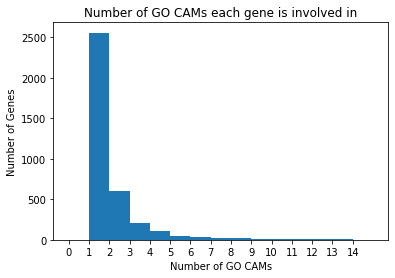

In [29]:
D = build_dict(data_cleaned)
x = []
for key in D:
    num_gocams = len(D.get(key))
    x.append(num_gocams)
plt.hist(x, bins=15, range=(0,15))
plt.xlabel("Number of GO CAMs")
plt.ylabel("Number of Genes")
plt.title("Number of GO CAMs each gene is involved in")
plt.xticks(np.arange(0,15))

In [24]:
def get_sizes (data): #data= dataframe with gocam IDs and gene identifiers as columns
    return data['gocam'].value_counts()
    

In [25]:
def filter_gene_list(gene_list, Dict):
    filtered_gene_list = []
    for gene in gene_list:
        if gene in Dict:
            filtered_gene_list.append(gene)
    return filtered_gene_list

In [26]:
def count_genes(gene_list, Dict):
    gocam_counts = {} #key=gocam, value=list of genes in gocam that are also in the user's list
    for g in gene_list: 
            gocams = Dict.get(g)
            for gocam in gocams:
                if (gocam in gocam_counts) == False:
                    gocam_counts[gocam]=[g]
                else:
                    prev = gocam_counts.get(gocam)
                    prev.append(g)
                    gocam_counts[gocam] = prev
    return gocam_counts

In [27]:
# APPLY BENJAMINI HOCHBERG CORRECTION in correct_pval_and_format()
def hgt(counts, gocam_sizes, alpha, gene_list_size, background_gene_list_size):
    results = []
    for gocam, gene_list in counts.items():
        count = len(gene_list) 
        gocam_size = gocam_sizes[gocam]
        pvalue = hypergeom.sf(count-1, background_gene_list_size,  gocam_size, gene_list_size) 
        if pvalue < alpha:
            r = (gocam, pvalue, count, gocam_size, gene_list )
            results.append(r)
    return results

In [28]:
def fdr(rank,num_tests,alpha):
    return (rank*alpha/num_tests)

In [29]:
#Benjamini Hochberg correction
def correct_pval_and_format(enriched_gocams, background_num_gocams):
    df = pd.DataFrame(enriched_gocams, columns =['Name', 'pval (uncorrected)', '# genes in list','#genes in gocam','shared genes in gocam'])
    df.sort_values('pval (uncorrected)',inplace=True)
    df.reset_index(drop=True, inplace=True)
    df['FDR_val'] = (df.index+1)*.05/background_num_gocams
    df['Less_than'] = (df['pval (uncorrected)'] < df['FDR_val'])
    index = df.Less_than.where(df.Less_than==True).last_valid_index()
    df_significant = df.loc[0:index]
    df_display = df_significant[['Name','pval (uncorrected)', '# genes in list', '#genes in gocam','shared genes in gocam']]
    return(df_display)

In [30]:
#as of now, Dict can only contain 1 instance of each gene per gocam (no duplicates)
#SURVIVAL FUNCTION, NOT PMF
def enrich(gene_list,gocam_sizes, Dict):
    background_gene_list_size = len(Dict)
    gene_list_filtered = filter_gene_list(gene_list, Dict) #need to clean gene_list to only include genes in the gocam
    gene_list_size = len(gene_list_filtered) #the size of the user's gene list AFTER filtering
    counts = count_genes(gene_list_filtered, Dict)
    enriched_gocams = hgt(counts, gocam_sizes, .05, gene_list_size, background_gene_list_size)
    background_num_gocams = len(gocam_sizes)
    df_display = correct_pval_and_format(enriched_gocams, background_num_gocams)
    return df_display
    
            
        
        
        
        

In [44]:
test_set = pd.read_csv("~/Desktop/GOCAM/cancer_genes_test_set.tsv", sep="\t")
test_set = test_set['Entry'].tolist()
gocam_sizes = get_sizes(data_cleaned)
Dict = build_dict(data_cleaned)

enrich(test_set, gocam_sizes, Dict)


,Name,pval (uncorrected),# genes in list,#genes in gocam,shared genes in gocam
0,http://model.geneontology.org/5f46c3b700001570,0.019149,2,4,"[Q92793, Q09472]"
1,http://model.geneontology.org/62900b6400001630,0.019149,2,4,"[P35222, P60484]"


In [43]:
gastric_test_set = pd.read_csv("~/Desktop/gastric_cancer.tsv", sep="\t")
gastric_test_set = gastric_test_set['Entry'].tolist()


enrich(gastric_test_set, gocam_sizes, Dict)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/nicholasmarkarian/Desktop/gastric_cancer.tsv'

In [ ]:
#DEBUGGING
alpha = .05
gene_list = gastric_test_set
Dict = build_dict(data_cleaned)
gocam_sizes = get_sizes(data_cleaned)
background_gene_list_size = len(Dict)
gene_list_filtered = filter_gene_list(gene_list, Dict)
counts = count_genes(gene_list_filtered, Dict)
results = []
gene_list_size = len(gene_list_filtered) #the size of the user's gene list AFTER filtering
for gocam, gene_list in counts.items():
    count = len(gene_list) 
    gocam_size = gocam_sizes[gocam]
    pvalue = hypergeom.sf(count-1, background_gene_list_size,  gocam_size, gene_list_size) 
    if pvalue < alpha:
        r = (gocam, pvalue, count, background_gene_list_size,  gocam_size, gene_list_size )
        results.append(r)
df = pd.DataFrame(results, columns =['gocam', 'pvalue', 'count', 'background_gene_list_size',  'gocam_size', 'gene_list_size'])
df